# Code to generate figure 2 part 2 for heatwaves for the paper

In [1]:
# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import yaml
import urllib.request
import matplotlib.font_manager
flist = matplotlib.font_manager.get_font_names()
from tempfile import NamedTemporaryFile
import urllib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib.patches as patches
from extremeweatherbench import evaluate, utils, cases, defaults, inputs, metrics
sns.set_theme(style='whitegrid')
from shapely.geometry import Polygon
import shapely
from pathlib import Path
import multiprocessing

# make the basepath - change this to your local path
basepath = Path.home() / 'ExtremeWeatherBench' / ''
basepath = str(basepath) + '/'

In [ ]:
# setup the templates to load in the data

# Forecast Examples
cira_heatwave_forecast_FOURv2 = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/FOUR_v200_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)

cira_heatwave_forecast_GC = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/GRAP_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)

cira_heatwave_forecast_AURO = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/AURO_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)

cira_heatwave_forecast_PANG = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/PANG_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)

hres_forecast = inputs.ZarrForecast(
    source="gs://weatherbench2/datasets/hres/2016-2022-0012-1440x721.zarr",
    variables=["surface_air_temperature"],
    variable_mapping=inputs.HRES_metadata_variable_mapping,
    storage_options={"remote_options": {"anon": True}},
)


FOURv2_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2, 
    ),
]

FOURv2_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2, 
    ),
]

GC_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_GC, 
    ),
]

GC_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_GC, 
    ),
]

PANG_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_PANG, 
    ),
]

PANG_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_PANG, 
    ),
]

HRES_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=hres_forecast,
    ),
]

HRES_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.era5_heatwave_target,
        forecast=hres_forecast,
    ),
]

In [19]:
# load in all of the events in the yaml file
case_dict = utils.load_events_yaml()
heat_test = {"cases": case_dict["cases"]}

ewb_fourv2_ghcn = evaluate.ExtremeWeatherBench(heat_test, FOURv2_GHCN_EVALUATION_OBJECTS)
ewb_fourv2_era5 = evaluate.ExtremeWeatherBench(heat_test, FOURv2_ERA5_EVALUATION_OBJECTS)

ewb_gc_ghcn = evaluate.ExtremeWeatherBench(heat_test, GC_GHCN_EVALUATION_OBJECTS)
ewb_gc_era5 = evaluate.ExtremeWeatherBench(heat_test, GC_ERA5_EVALUATION_OBJECTS)

ewb_pang_ghcn = evaluate.ExtremeWeatherBench(heat_test, PANG_GHCN_EVALUATION_OBJECTS)
ewb_pang_era5 = evaluate.ExtremeWeatherBench(heat_test, PANG_ERA5_EVALUATION_OBJECTS)

ewb_hres_ghcn = evaluate.ExtremeWeatherBench(heat_test, HRES_GHCN_EVALUATION_OBJECTS)
ewb_hres_era5 = evaluate.ExtremeWeatherBench(heat_test, HRES_ERA5_EVALUATION_OBJECTS)

This function is deprecated and will be removed in a future release. Please use cases.load_ewb_events_yaml_into_case_collection instead.
This function is deprecated and will be removed in a future release. Please use cases.read_incoming_yaml instead.


In [136]:
ewb_fourv2_era5.case_operators


[CaseOperator(case_metadata=IndividualCase(case_id_number=1, title='2021 Pacific Northwest', start_date=datetime.datetime(2021, 6, 20, 0, 0), end_date=datetime.datetime(2021, 7, 3, 0, 0), location=CenteredRegion(latitude=47.6062, longitude=237.6679, bounding_box_degrees=5), event_type='heat_wave'), metric_list=[<class 'extremeweatherbench.metrics.MaximumMAE'>, <class 'extremeweatherbench.metrics.RMSE'>, <class 'extremeweatherbench.metrics.OnsetME'>, <class 'extremeweatherbench.metrics.DurationME'>, <class 'extremeweatherbench.metrics.MaxMinMAE'>], target=ERA5(source='gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3', name='ERA5', variables=['surface_air_temperature'], variable_mapping={'2m_temperature': 'surface_air_temperature', 'time': 'valid_time'}, storage_options={'remote_options': {'anon': True}}, preprocess=<function _default_preprocess at 0x7feee1745d00>, chunks=None), forecast=KerchunkForecast(source='gs://extremeweatherbench/FOUR_v200_GFS.parq', name='kerc

In [ ]:
# load in the results for all heat waves in parallel
# this will take awhile to run if you do them all in one code box so I commented most of them out here and copied them below
n_threads_per_process = 4
n_processes = max(1, multiprocessing.cpu_count() // n_threads_per_process)

fourv2_ghcn_results = ewb_fourv2_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
fourv2_era5_results = ewb_fourv2_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

# gc_ghcn_results = ewb_gc_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
# gc_era5_results = ewb_gc_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

# pang_ghcn_results = ewb_pang_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
# pang_era5_results = ewb_pang_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

# hres_ghcn_results = ewb_hres_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
# hres_era5_results = ewb_hres_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

  0%|          | 0/46 [00:00<?, ?it/s]

forecast dataset for case 1 has zero-length dimensions ['valid_time'] for case time range 2021-06-20 00:00:00 to 2021-07-03 00:00:00
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
forecast dataset for case 18 has zero-length dimensions ['valid_time'] for case time range 2021-06-18 00:00:00 to 2021-06-30 00:00:00
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
forecast data

  0%|          | 0/46 [00:00<?, ?it/s]

forecast dataset for case 1 has zero-length dimensions ['valid_time'] for case time range 2021-06-20 00:00:00 to 2021-07-03 00:00:00
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
forecast dataset for case 18 has zero-length dimensions ['valid_time'] for case time range 2021-06-18 00:00:00 to 2021-06-30 00:00:00
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected col

In [20]:
gc_ghcn_results = ewb_gc_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
gc_era5_results = ewb_gc_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

  0%|          | 0/46 [00:00<?, ?it/s]

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [13]:
pang_ghcn_results = ewb_pang_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
pang_era5_results = ewb_pang_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

  0%|          | 0/46 [00:00<?, ?it/s]

forecast dataset for case 1 has zero-length dimensions ['valid_time'] for case time range 2021-06-20 00:00:00 to 2021-07-03 00:00:00
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Missing expected columns: {'lead_time'}
/home/amy/ExtremeWeatherBench/.venv/lib/p

  0%|          | 0/46 [00:00<?, ?it/s]

forecast dataset for case 1 has zero-length dimensions ['valid_time'] for case time range 2021-06-20 00:00:00 to 2021-07-03 00:00:00
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
forecast dataset for case 18 has zero-length dimensions ['valid_time'] for case time range 2021-06-18 00:00:00 to 2021-06-30 00:00:00
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-pack

In [14]:
hres_ghcn_results = ewb_hres_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
hres_era5_results = ewb_hres_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

  0%|          | 0/46 [00:00<?, ?it/s]

forecast dataset for case 7 has zero-length dimensions ['valid_time'] for case time range 2023-11-18 00:00:00 to 2023-11-28 00:00:00
forecast dataset for case 9 has zero-length dimensions ['valid_time'] for case time range 2023-07-07 00:00:00 to 2023-07-27 00:00:00
forecast dataset for case 5 has zero-length dimensions ['valid_time'] for case time range 2023-05-10 00:00:00 to 2023-05-23 00:00:00
forecast dataset for case 10 has zero-length dimensions ['valid_time'] for case time range 2023-08-17 00:00:00 to 2023-08-28 00:00:00
forecast dataset for case 11 has zero-length dimensions ['valid_time'] for case time range 2023-07-29 00:00:00 to 2023-08-04 00:00:00
forecast dataset for case 8 has zero-length dimensions ['valid_time'] for case time range 2023-09-02 00:00:00 to 2023-09-13 00:00:00
forecast dataset for case 17 has zero-length dimensions ['valid_time'] for case time range 2023-02-15 00:00:00 to 2023-03-01 00:00:00
forecast dataset for case 15 has zero-length dimensions ['valid_ti

  0%|          | 0/46 [00:00<?, ?it/s]

forecast dataset for case 9 has zero-length dimensions ['valid_time'] for case time range 2023-07-07 00:00:00 to 2023-07-27 00:00:00
forecast dataset for case 7 has zero-length dimensions ['valid_time'] for case time range 2023-11-18 00:00:00 to 2023-11-28 00:00:00
forecast dataset for case 8 has zero-length dimensions ['valid_time'] for case time range 2023-09-02 00:00:00 to 2023-09-13 00:00:00
forecast dataset for case 17 has zero-length dimensions ['valid_time'] for case time range 2023-02-15 00:00:00 to 2023-03-01 00:00:00
forecast dataset for case 16 has zero-length dimensions ['valid_time'] for case time range 2023-04-16 00:00:00 to 2023-04-22 00:00:00
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
forecast dataset for case 5 has zero-length dimensions ['val

In [21]:
# save the results so I don't have to keep re-running
fourv2_ghcn_results.to_csv(basepath + 'docs/notebooks/figure2_part2_fourv2_ghcn_results.csv')
fourv2_era5_results.to_csv(basepath + 'docs/notebooks/figure2_part2_fourv2_era5_results.csv')
# gc_ghcn_results.to_csv(basepath + 'docs/notebooks/figure2_part2_gc_ghcn_results.csv')
# gc_era5_results.to_csv(basepath + 'docs/notebooks/figure2_part2_gc_era5_results.csv')
pang_ghcn_results.to_csv(basepath + 'docs/notebooks/figure2_part2_pang_ghcn_results.csv')
pang_era5_results.to_csv(basepath + 'docs/notebooks/figure2_part2_pang_era5_results.csv')
hres_ghcn_results.to_csv(basepath + 'docs/notebooks/figure2_part2_hres_ghcn_results.csv')
hres_era5_results.to_csv(basepath + 'docs/notebooks/figure2_part2_hres_era5_results.csv')

In [5]:
fourv2_era5_results

,value,lead_time,target_variable,metric,target_source,forecast_source,case_id_number,event_type
0,0.145935,0 days 00:00:00,surface_air_temperature,MaximumMAE,ERA5,kerchunk_forecast,1,heat_wave
1,3.667328,0 days 06:00:00,surface_air_temperature,MaximumMAE,ERA5,kerchunk_forecast,1,heat_wave
2,0.925415,0 days 12:00:00,surface_air_temperature,MaximumMAE,ERA5,kerchunk_forecast,1,heat_wave
3,3.930511,0 days 18:00:00,surface_air_temperature,MaximumMAE,ERA5,kerchunk_forecast,1,heat_wave
4,1.012054,1 days 00:00:00,surface_air_temperature,MaximumMAE,ERA5,kerchunk_forecast,1,heat_wave
...,...,...,...,...,...,...,...,...
10381,NaN,9 days 00:00:00,surface_air_temperature,MaxMinMAE,ERA5,kerchunk_forecast,88,heat_wave
10382,NaN,9 days 06:00:00,surface_air_temperature,MaxMinMAE,ERA5,kerchunk_forecast,88,heat_wave
10383,NaN,9 days 12:00:00,surface_air_temperature,MaxMinMAE,ERA5,kerchunk_forecast,88,heat_wave
10384,NaN,9 days 18:00:00,surface_air_temperature,MaxMinMAE,ERA5,kerchunk_forecast,88,heat_wave


In [6]:
gc_ghcn_results

,value,lead_time,target_variable,metric,target_source,forecast_source,case_id_number,event_type
0,1.885016,0 days 00:00:00,surface_air_temperature,MaximumMAE,GHCN,kerchunk_forecast,2,heat_wave
1,1.94483,0 days 06:00:00,surface_air_temperature,MaximumMAE,GHCN,kerchunk_forecast,2,heat_wave
2,1.961279,0 days 12:00:00,surface_air_temperature,MaximumMAE,GHCN,kerchunk_forecast,2,heat_wave
3,2.4401,0 days 18:00:00,surface_air_temperature,MaximumMAE,GHCN,kerchunk_forecast,2,heat_wave
4,1.921576,1 days 00:00:00,surface_air_temperature,MaximumMAE,GHCN,kerchunk_forecast,2,heat_wave
...,...,...,...,...,...,...,...,...
9509,1.09281,9 days 00:00:00,surface_air_temperature,MaxMinMAE,GHCN,kerchunk_forecast,88,heat_wave
9510,1.410986,9 days 06:00:00,surface_air_temperature,MaxMinMAE,GHCN,kerchunk_forecast,88,heat_wave
9511,1.519446,9 days 12:00:00,surface_air_temperature,MaxMinMAE,GHCN,kerchunk_forecast,88,heat_wave
9512,1.630438,9 days 18:00:00,surface_air_temperature,MaxMinMAE,GHCN,kerchunk_forecast,88,heat_wave


In [22]:
# grab only the maximum MAE results for the heat wave
fourv2_ghcn_group = fourv2_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
fourv2_ghcn_group = fourv2_ghcn_group.reset_index()

fourv2_era5_group = fourv2_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
fourv2_era5_group = fourv2_era5_group.reset_index()

# gc_ghcn_group = gc_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
# gc_ghcn_group = gc_ghcn_group.reset_index()

# gc_era5_group = gc_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
# gc_era5_group = gc_era5_group.reset_index()

pang_ghcn_group = pang_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
pang_ghcn_group = pang_ghcn_group.reset_index()

pang_era5_group = pang_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
pang_era5_group = pang_era5_group.reset_index()

hres_ghcn_group = hres_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
hres_ghcn_group = hres_ghcn_group.reset_index()

hres_era5_group = hres_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
hres_era5_group = hres_era5_group.reset_index()



In [34]:
fourv2_ghcn_group[fourv2_ghcn_group['metric'] == 'MaximumMAE']['value'].values

array([3.0742371959377985, 3.4071349106547815, 3.707120340746384,
       3.887300991421245, 3.4236525616964557, 4.027552379049048,
       3.675866011646709, 3.9845270598798406, 3.8760853573634355,
       4.043867433696183, 3.6174999819546416, 4.12997278037587,
       3.7781693530938134, 4.341073040792537, 3.965430100502177,
       4.564128199135171, 4.291281186076305, 4.7961119289063765,
       4.223108890927324, 4.743217699925721, 4.217907418134809,
       4.818832992429442, 4.362876988742062, 4.990545958621778,
       4.631572199043661, 5.160147124333543, 4.6920311498093525,
       5.275629547721481, 4.957966778372817, 5.612110276537784,
       5.383438674269322, 5.6733804022136685, 5.375575030774712,
       5.969693733454368, 5.774654863631604, 6.233282048419025,
       5.935528631573101, 6.292113399562998, 6.264601666706156,
       6.409013937447423, 6.349828320049179], dtype=object)

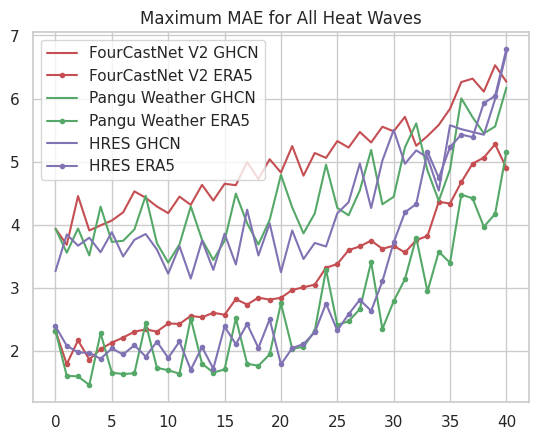

In [23]:
plt.plot(fourv2_ghcn_group[fourv2_ghcn_group['metric'] == 'MaximumMAE']['value'].values, 'r', label='FourCastNet V2 GHCN')
plt.plot(fourv2_era5_group[fourv2_era5_group['metric'] == 'MaximumMAE']['value'].values, 'r.-', label='FourCastNet V2 ERA5')

# plt.plot(gc_ghcn_group[gc_ghcn_group['metric'] == 'MaximumMAE']['value'].values, 'b', label='GraphCast GHCN')
# plt.plot(gc_era5_group[gc_era5_group['metric'] == 'MaximumMAE']['value'].values, 'b.-', label='GraphCast ERA5')

plt.plot(pang_ghcn_group[pang_ghcn_group['metric'] == 'MaximumMAE']['value'].values, 'g', label='Pangu Weather GHCN')
plt.plot(pang_era5_group[pang_era5_group['metric'] == 'MaximumMAE']['value'].values, 'g.-', label='Pangu Weather ERA5')

plt.plot(hres_ghcn_group[hres_ghcn_group['metric'] == 'MaximumMAE']['value'].values, 'm', label='HRES GHCN')
plt.plot(hres_era5_group[hres_era5_group['metric'] == 'MaximumMAE']['value'].values, 'm.-', label='HRES ERA5')

plt.title('Maximum MAE for All Heat Waves')
plt.legend()

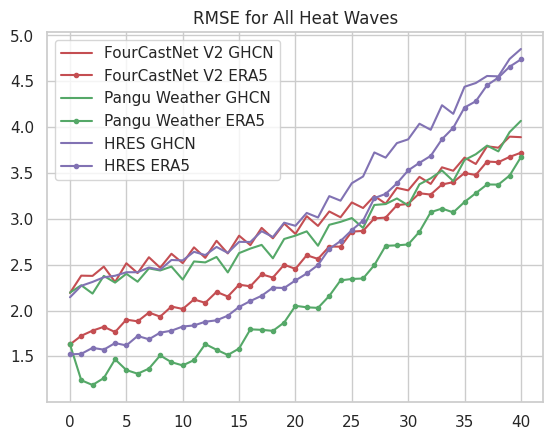

In [24]:
plt.plot(fourv2_ghcn_group[fourv2_ghcn_group['metric'] == 'RMSE']['value'].values, 'r', label='FourCastNet V2 GHCN')
plt.plot(fourv2_era5_group[fourv2_era5_group['metric'] == 'RMSE']['value'].values, 'r.-', label='FourCastNet V2 ERA5')

# plt.plot(gc_ghcn_group[gc_ghcn_group['metric'] == 'RMSE']['value'].values, 'b', label='GraphCast GHCN')
# plt.plot(gc_era5_group[gc_era5_group['metric'] == 'RMSE']['value'].values, 'b.-', label='GraphCast ERA5')

plt.plot(pang_ghcn_group[pang_ghcn_group['metric'] == 'RMSE']['value'].values, 'g', label='Pangu Weather GHCN')
plt.plot(pang_era5_group[pang_era5_group['metric'] == 'RMSE']['value'].values, 'g.-', label='Pangu Weather ERA5')

plt.plot(hres_ghcn_group[hres_ghcn_group['metric'] == 'RMSE']['value'].values, 'm', label='HRES GHCN')
plt.plot(hres_era5_group[hres_era5_group['metric'] == 'RMSE']['value'].values, 'm.-', label='HRES ERA5')

plt.title('RMSE for All Heat Waves')
plt.legend()

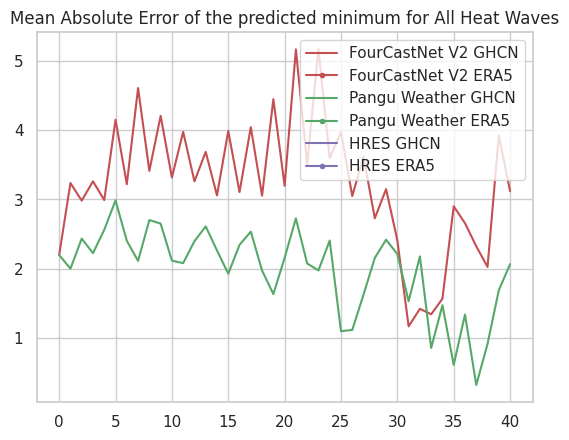

In [25]:
plt.plot(fourv2_ghcn_group[fourv2_ghcn_group['metric'] == 'MaxMinMAE']['value'].values, 'r', label='FourCastNet V2 GHCN')
plt.plot(fourv2_era5_group[fourv2_era5_group['metric'] == 'MaxMinMAE']['value'].values, 'r.-', label='FourCastNet V2 ERA5')

# plt.plot(gc_ghcn_group[gc_ghcn_group['metric'] == 'MaxMinMAE']['value'].values, 'b', label='GraphCast GHCN')
# plt.plot(gc_era5_group[gc_era5_group['metric'] == 'MaxMinMAE']['value'].values, 'b.-', label='GraphCast ERA5')

plt.plot(pang_ghcn_group[pang_ghcn_group['metric'] == 'MaxMinMAE']['value'].values, 'g', label='Pangu Weather GHCN')
plt.plot(pang_era5_group[pang_era5_group['metric'] == 'MaxMinMAE']['value'].values, 'g.-', label='Pangu Weather ERA5')

plt.plot(hres_ghcn_group[hres_ghcn_group['metric'] == 'MaxMinMAE']['value'].values, 'm', label='HRES GHCN')
plt.plot(hres_era5_group[hres_era5_group['metric'] == 'MaxMinMAE']['value'].values, 'm.-', label='HRES ERA5')

plt.title('Mean Absolute Error of the predicted minimum for All Heat Waves')
plt.legend()

# subset the data into regions

In [121]:
# helper function to convert a bounding box tuple to a shapely Polygon
def get_polygon_from_bounding_box(bounding_box):
    """Convert a bounding box tuple to a shapely Polygon."""
    if bounding_box is None:
        return None
    left_lon, right_lon, bot_lat, top_lat = bounding_box
    return Polygon(
        [
            (left_lon, bot_lat),
            (right_lon, bot_lat),
            (right_lon, top_lat),
            (left_lon, top_lat),
            (left_lon, bot_lat),
        ]
    )

# North America
na_bounding_box = [-172, -45, 7, 85]
na_bounding_box_polygon = get_polygon_from_bounding_box(na_bounding_box)

# Europe bounding box
eu_bounding_box = [50, -15, 15, 75]
eu_bounding_box_polygon = get_polygon_from_bounding_box(eu_bounding_box)

# australia bounding box
au_bounding_box = [110, 180, -50, -10]
au_bounding_box_polygon = get_polygon_from_bounding_box(au_bounding_box)


In [165]:
na_cases = list()
eu_cases = list()
au_cases = list()

for heat_case in ewb_fourv2_era5.case_operators:
    #print(heat_case.case_metadata)

    my_case = heat_case.case_metadata

    # collect the North America, Europe, and Australia cases
    if (shapely.intersects(my_case.location.geopandas.geometry[0], na_bounding_box_polygon)):
        na_cases.append(my_case.case_id_number)
    elif (shapely.intersects(my_case.location.geopandas.geometry[0], eu_bounding_box_polygon)):
        eu_cases.append(my_case.case_id_number)
    elif (shapely.intersects(my_case.location.geopandas.geometry[0], au_bounding_box_polygon)):
        au_cases.append(my_case.case_id_number)

print(f'North America Cases: {na_cases}')
print(f'Europe Cases: {eu_cases}')
print(f'Australia Cases: {au_cases}')


North America Cases: [1, 2, 3, 4, 5, 6, 27, 72, 73, 74, 75, 76, 77, 79, 86]
Europe Cases: [8, 9, 10, 14, 15, 18, 19, 20, 21, 22, 82, 83, 84, 85]
Australia Cases: [7, 26, 28, 29, 80]


In [166]:
# make all the subsets
na_fourv2_era5_results = fourv2_era5_results[fourv2_era5_results['case_id_number'].isin(na_cases)]
eu_fourv2_era5_results = fourv2_era5_results[fourv2_era5_results['case_id_number'].isin(eu_cases)]
au_fourv2_era5_results = fourv2_era5_results[fourv2_era5_results['case_id_number'].isin(au_cases)]

na_fourv2_ghcn_results = fourv2_ghcn_results[fourv2_ghcn_results['case_id_number'].isin(na_cases)]
eu_fourv2_ghcn_results = fourv2_ghcn_results[fourv2_ghcn_results['case_id_number'].isin(eu_cases)]
au_fourv2_ghcn_results = fourv2_ghcn_results[fourv2_ghcn_results['case_id_number'].isin(au_cases)]

na_gc_ghcn_results = gc_ghcn_results[gc_ghcn_results['case_id_number'].isin(na_cases)]
eu_gc_ghcn_results = gc_ghcn_results[gc_ghcn_results['case_id_number'].isin(eu_cases)]
au_gc_ghcn_results = gc_ghcn_results[gc_ghcn_results['case_id_number'].isin(au_cases)]

na_gc_era5_results = gc_era5_results[gc_era5_results['case_id_number'].isin(na_cases)]
eu_gc_era5_results = gc_era5_results[gc_era5_results['case_id_number'].isin(eu_cases)]
au_gc_era5_results = gc_era5_results[gc_era5_results['case_id_number'].isin(au_cases)]


In [ ]:
# do the groupby for each subset
na_fourv2_ghcn_group = na_fourv2_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
na_fourv2_ghcn_group = na_fourv2_ghcn_group.reset_index()

eu_fourv2_ghcn_group = eu_fourv2_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
eu_fourv2_ghcn_group = eu_fourv2_ghcn_group.reset_index()

au_fourv2_ghcn_group = au_fourv2_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
au_fourv2_ghcn_group = au_fourv2_ghcn_group.reset_index()


# fourv2_era5_group = fourv2_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
# fourv2_era5_group = fourv2_era5_group.reset_index()

# gc_ghcn_group = gc_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
# gc_ghcn_group = gc_ghcn_group.reset_index()

# gc_era5_group = gc_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
# gc_era5_group = gc_era5_group.reset_index()


        metric        lead_time     value
0    MaxMinMAE  0 days 00:00:00       NaN
1    MaxMinMAE  0 days 06:00:00       NaN
2    MaxMinMAE  0 days 12:00:00       NaN
3    MaxMinMAE  0 days 18:00:00       NaN
4    MaxMinMAE  1 days 00:00:00       NaN
..         ...              ...       ...
118       RMSE  9 days 00:00:00  3.325159
119       RMSE  9 days 06:00:00  3.497148
120       RMSE  9 days 12:00:00  3.465203
121       RMSE  9 days 18:00:00  3.626614
122       RMSE 10 days 00:00:00  3.550858

[123 rows x 3 columns]


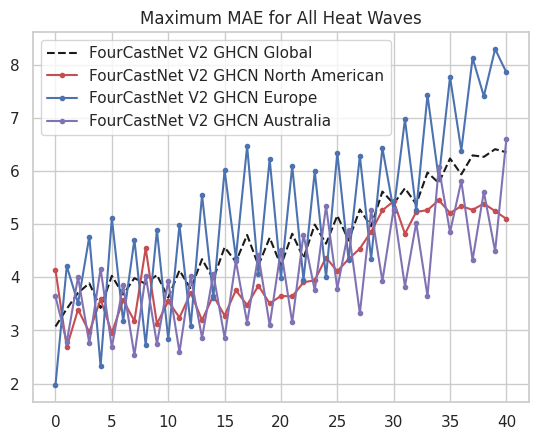

In [185]:
plt.plot(fourv2_ghcn_group[fourv2_ghcn_group['metric'] == 'MaximumMAE']['value'].values, 'k--', label='FourCastNet V2 GHCN Global')
plt.plot(na_fourv2_ghcn_group[na_fourv2_ghcn_group['metric'] == 'MaximumMAE']['value'].values, 'r.-', label='FourCastNet V2 GHCN North American')
plt.plot(eu_fourv2_ghcn_group[eu_fourv2_ghcn_group['metric'] == 'MaximumMAE']['value'].values, 'b.-', label='FourCastNet V2 GHCN Europe')
plt.plot(au_fourv2_ghcn_group[au_fourv2_ghcn_group['metric'] == 'MaximumMAE']['value'].values, 'm.-', label='FourCastNet V2 GHCN Australia')


# plt.plot(fourv2_era5_group[fourv2_era5_group['metric'] == 'MaximumMAE']['value'].values, 'r.-', label='FourCastNet V2 ERA5')

# plt.plot(gc_ghcn_group[gc_ghcn_group['metric'] == 'MaximumMAE']['value'].values, 'b', label='GraphCast GHCN')
# plt.plot(gc_era5_group[gc_era5_group['metric'] == 'MaximumMAE']['value'].values, 'b.-', label='GraphCast ERA5')

plt.title('Maximum MAE for All Heat Waves')
plt.legend()